# Titanic Survival prediction using decision tree
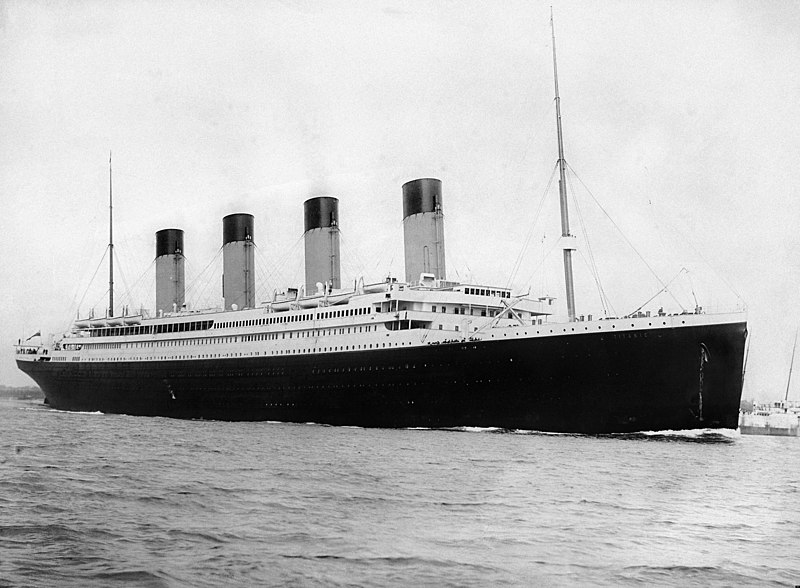

We will be predicting whether a passenger had the chance to survive based on his
Pclass,
Gender,
Age and
Fare

Importing dependancies

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split

In [36]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/titanic decision tree/titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


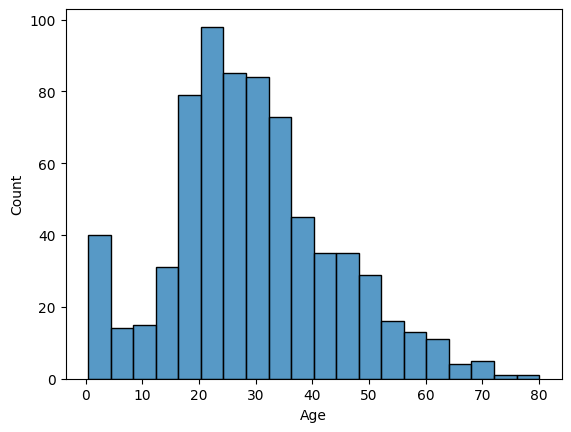

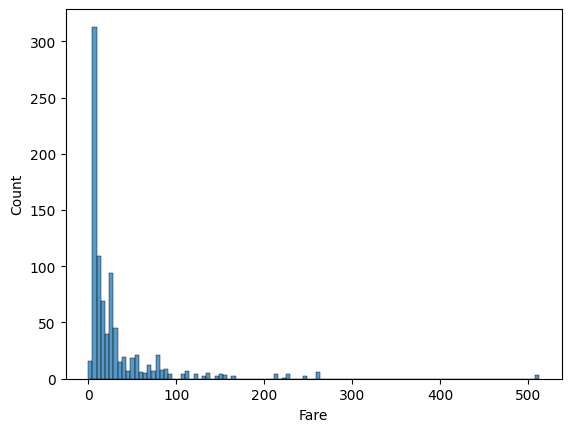

In [37]:
import seaborn as sns
# Histograms for numerical features
sns.histplot(df['Age'])
plt.show()

sns.histplot(df['Fare'])
plt.show()


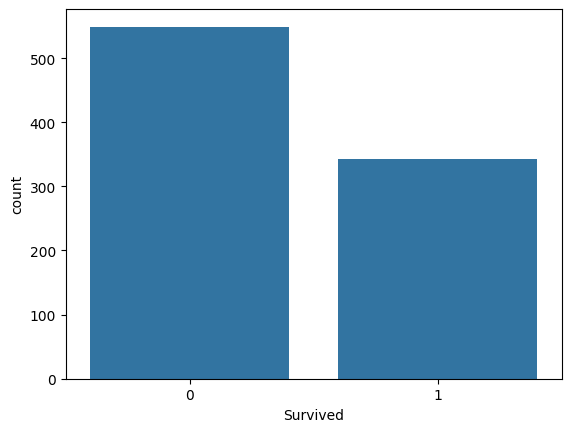

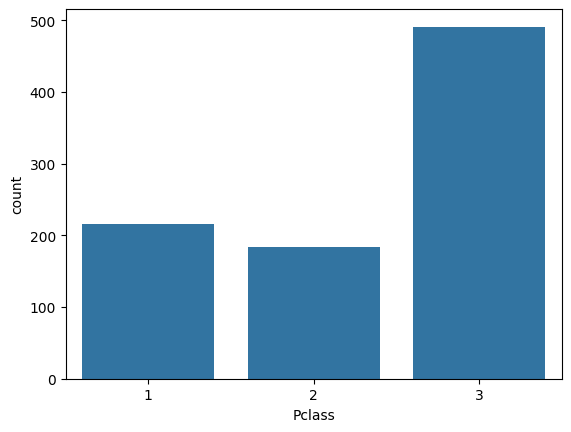

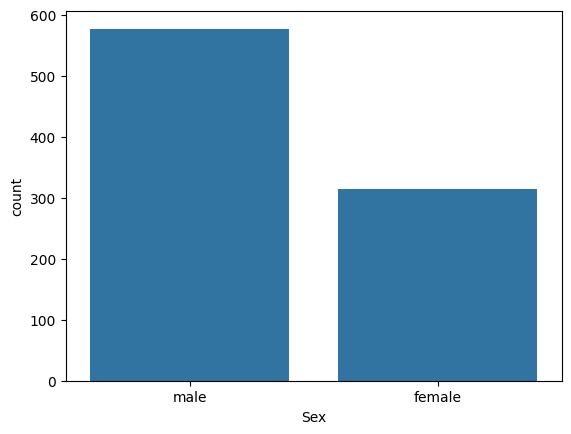

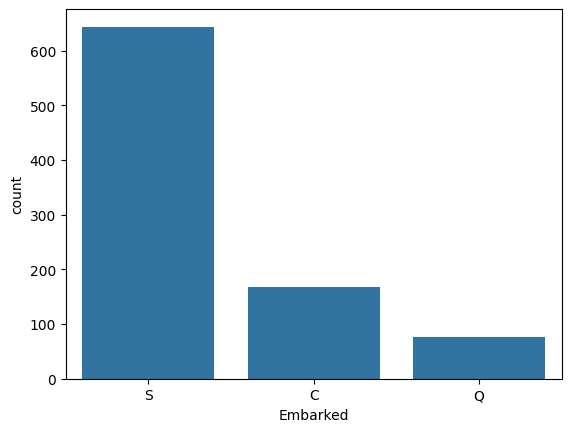

In [38]:
 # Count plots for categorical features
sns.countplot(x='Survived', data=df)
plt.show()

sns.countplot(x='Pclass', data=df)
plt.show()

sns.countplot(x='Sex', data=df)
plt.show()

sns.countplot(x='Embarked', data=df)
plt.show()

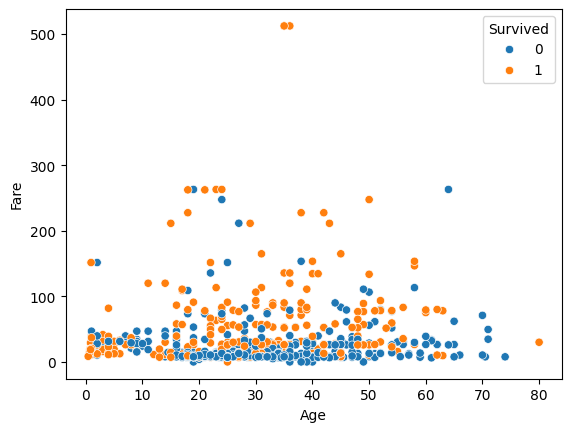

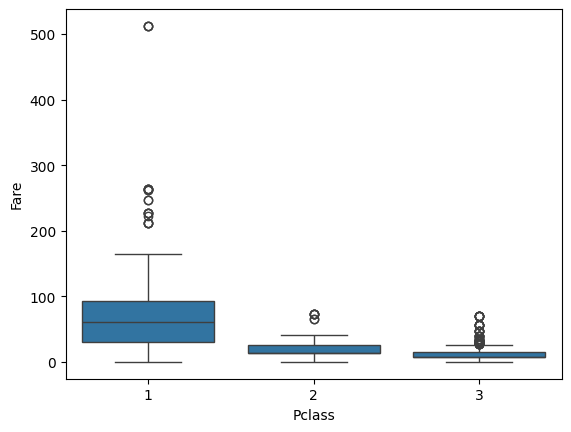

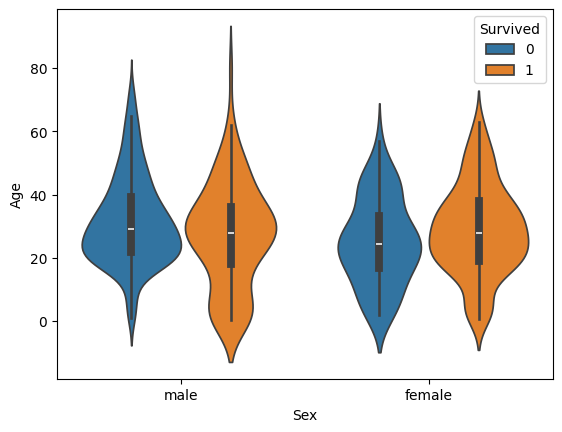

In [39]:
# Scatter plot for Age vs Fare
sns.scatterplot(x='Age', y='Fare', hue='Survived', data=df)
plt.show()

 # Box plot for Pclass vs Fare
sns.boxplot(x='Pclass', y='Fare', data=df)
plt.show()

 # Violin plot for Sex vs Age
sns.violinplot(x='Sex', y='Age', hue='Survived', data=df)
plt.show()

Removing unwanted data columns for the ease of analysis

In [40]:
df2 = df.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin','Embarked'],axis = 'columns')
df2.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500


Using label encoder to encode strings to fit the model

In [41]:
from sklearn.preprocessing import LabelEncoder
le_gender = LabelEncoder()

In [42]:
df2['Gender'] = le_gender.fit_transform(df2['Sex'])

In [43]:
df2.drop(['Sex'],axis = 'columns',inplace = True)

In [44]:
df2.head()

,Survived,Pclass,Age,Fare,Gender
0,0,3,22.0,7.2500,1
1,1,1,38.0,71.2833,0
2,1,3,26.0,7.9250,0
3,1,1,35.0,53.1000,0
4,0,3,35.0,8.0500,1


Now let's seperate the features and variables

In [45]:
inputs = df2.drop('Survived', axis ='columns')
target = df2['Survived']

Spliting our dataset into trainig and testing sets

In [46]:
X_train, X_test, Y_train, Y_test = train_test_split(inputs, target, test_size =0.2)

In [47]:
tree_model = tree.DecisionTreeClassifier()
tree_model.fit(X_train, Y_train)

DecisionTreeClassifier()

In [48]:
tree_model.score(X_test, Y_test)

0.7821229050279329

In [51]:
tree_model.predict([[1,38.0,71.2833,0]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])